 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [357]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [358]:
pwd

'/Users/cynthiadavis/Documents/GitHub/Module_4_Challenge/Starter_Code'

In [359]:
!ls

Resources            whale_analysis.ipynb


In [360]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_path

PosixPath('Resources/whale_returns.csv')

In [361]:
whale_df = pd.read_csv(whale_path)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [362]:
# Count nulls
whale_returns_null_count = whale_df.isnull().sum()
whale_returns_null_count

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [363]:
# Drop nulls
whale_df = whale_df.dropna()

In [364]:
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [365]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path)

In [366]:
# Count nulls
algo_returns_null_count = algo_df.isnull().sum()
algo_returns_null_count

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [367]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [368]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv("Resources/sp500_history.csv")
print(sp500_df.shape)
sp500_df.head()

(1649, 2)


,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [369]:
# Check Data Types
print("Date values are type :", type(sp500_df['Date'].iloc[0]))
print("Close values are type :", type(sp500_df['Close'].iloc[0]))

Date values are type : <class 'str'>
Close values are type : <class 'str'>


In [370]:
# Fix Data Types
def convert_dollar_string_to_float(dollar_string):
    return float(dollar_string.strip('$'))

# Fix Date
sp500_df["Date"] = sp500_df["Date"].apply(pd.to_datetime)

# Fix Close
sp500_df["Close"] = sp500_df["Close"].apply(convert_dollar_string_to_float)

print("Date values are now type :", type(sp500_df['Date'].iloc[0]))
print("Close values are now type :", type(sp500_df['Close'].iloc[0]))


sp500_df.head()

Date values are now type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Close values are now type : <class 'numpy.float64'>


,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06


In [371]:
sp500_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [372]:
print("Date values are now type :", type(sp500_df['Date'].iloc[0]))
print("Close values are now type :", type(sp500_df['Close'].iloc[0]))

Date values are now type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Close values are now type : <class 'numpy.float64'>


In [373]:
sp500_df.head()

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06


In [374]:
# Order dataframe by date
sp500_df = sp500_df.sort_values(by="Date")

In [375]:
# Calculate Daily Returns
sp500_df["sp500_return"] = sp500_df["Close"].pct_change()
sp500_df.head()

,Date,Close,sp500_return
1648,2012-10-01,1444.49,NaN
1647,2012-10-02,1445.75,0.000872
1646,2012-10-03,1450.99,0.003624
1645,2012-10-04,1461.40,0.007174
1644,2012-10-05,1460.93,-0.000322


In [376]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df

,Date,Close,sp500_return
1647,2012-10-02,1445.75,0.000872
1646,2012-10-03,1450.99,0.003624
1645,2012-10-04,1461.40,0.007174
1644,2012-10-05,1460.93,-0.000322
1643,2012-10-08,1455.88,-0.003457
...,...,...,...
4,2019-04-16,2907.06,0.000509
3,2019-04-17,2900.45,-0.002274
2,2019-04-18,2905.03,0.001579
1,2019-04-22,2907.97,0.001012


In [377]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns = {'sp500_return':'SP500 Close'}, inplace = True)
sp500_df.head()

,Date,Close,SP500 Close
1647,2012-10-02,1445.75,0.000872
1646,2012-10-03,1450.99,0.003624
1645,2012-10-04,1461.40,0.007174
1644,2012-10-05,1460.93,-0.000322
1643,2012-10-08,1455.88,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [378]:
## join attempt 1
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df2 = pd.concat([whale_df, algo_df, sp500_df], join = "outer")
df2

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,SP500 Close
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN,NaN
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN,NaN
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN,NaN
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN,NaN
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4,2019-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2907.06,0.000509
3,2019-04-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2900.45,-0.002274
2,2019-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2905.03,0.001579
1,2019-04-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2907.97,0.001012


In [379]:
## join attempt 2 
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_df['Date'] = whale_df['Date'].apply(pd.to_datetime)
algo_df['Date'] = algo_df['Date'].apply(pd.to_datetime)
sp500_df['Date'] = sp500_df['Date'].apply(pd.to_datetime)

joined_df = pd.merge(whale_df, algo_df, how="outer", on="Date")
joined_df = pd.merge(joined_df, sp500_df, how="outer", on="Date")
joined_df = joined_df.set_index("Date")

# Standardize column names
joined_df = joined_df.rename(
    columns={
        "SOROS FUND MANAGEMENT LLC": "soros_return",
        "PAULSON & CO.INC. ": "paulson_return",
        "TIGER GLOBAL MANAGEMENT LLC": "tiger_return",
        "BERKSHIRE HATHAWAY INC": "bh_return",
        "Algo 1": "algo1_return",
        "Algo 2": "algo2_return",
        }
    )

joined_df.head()

/var/folders/g2/1gmdxmzj43b092pwlfvgqz2w0000gn/T/ipykernel_35094/3945045443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whale_df['Date'] = whale_df['Date'].apply(pd.to_datetime)


,soros_return,paulson_return,tiger_return,bh_return,algo1_return,algo2_return,Close,SP500 Close
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

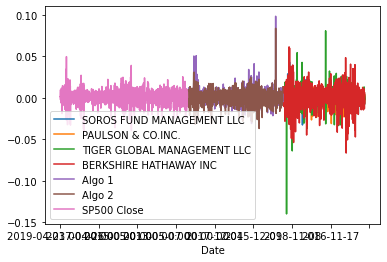

In [380]:
# Plot daily returns of all portfolios
df2 = df2[df2.columns.drop('Close')]
df2.set_index("Date")[::-1].plot()

<AxesSubplot:xlabel='Date'>

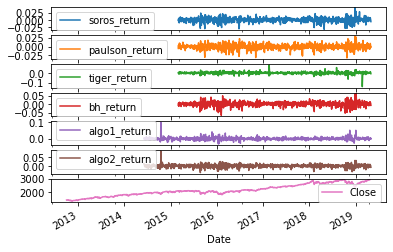

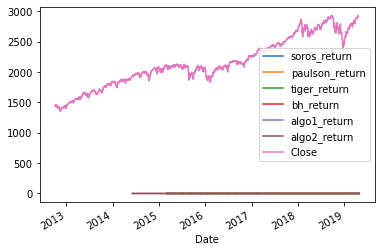

In [381]:
# another way to plot 
returns_df = joined_df.drop("SP500 Close", axis=1)
axes = returns_df.plot(subplots=True)
for ax in axes:
    ax.plot()

returns_df.plot()

#### Calculate and Plot cumulative returns.

,portfolio_name,cumulative_return
0,soros_return,1.891519e-01
1,paulson_return,-2.150906e-01
2,tiger_return,-8.539324e-02
3,bh_return,5.303702e-01
4,algo1_return,8.079627e-01
5,algo2_return,4.210609e-01
6,Close,3.550962e+06


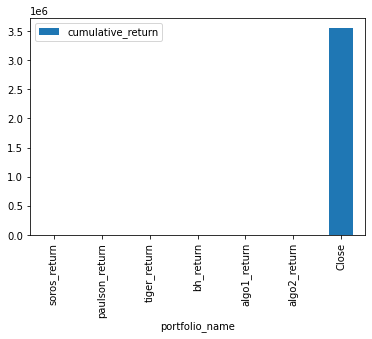

In [382]:
# Calculate cumulative returns of all portfolios
cumulative_returns = [
    {
        "portfolio_name": col,
        "cumulative_return": returns_df[col].sum()
    }
    for col in returns_df
]

# Plot cumulative returns
cumulative_returns_df = pd.DataFrame(cumulative_returns)
cumulative_returns_df.plot(x="portfolio_name", y="cumulative_return", kind='bar')
cumulative_returns_df

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


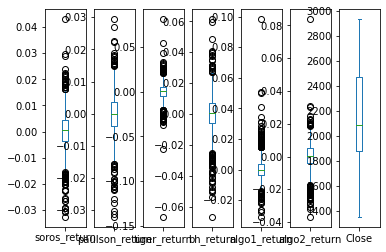

In [383]:
# Box plot to visually show risk
axes = returns_df.plot(kind='box',subplots=True)
for ax in axes:
    ax.plot()

### Calculate Standard Deviations

In [384]:
# Calculate the daily standard deviations of all portfolios
returns_df.pct_change().std()

soros_return             NaN
paulson_return           NaN
tiger_return             NaN
bh_return                NaN
algo1_return       14.730470
algo2_return      539.990171
Close               0.013960
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [404]:
# Calculate the daily standard deviation of S&P 500
sp500_df.pct_change().std()

# Determine which portfolios are riskier than the S&P 500


TypeError: cannot perform __truediv__ with this index type: DatetimeArray

### Calculate the Annualized Standard Deviation

In [386]:
# Calculate the annualized standard deviation (252 trading days)
returns_df.pct_change().std()*np.sqrt(252)

soros_return              NaN
paulson_return            NaN
tiger_return              NaN
bh_return                 NaN
algo1_return       233.838956
algo2_return      8572.078215
Close                0.221604
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

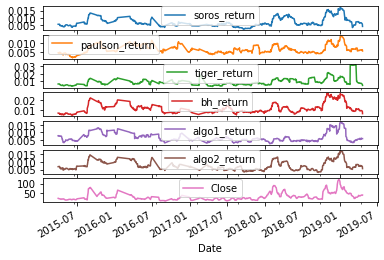

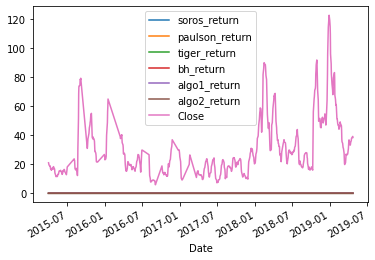

In [387]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
axes = returns_df.rolling(21).std().dropna().plot(subplots=True)
for ax in axes:
    ax.plot()

# Plot the rolling standard deviation
returns_df.rolling(21).std().dropna().plot()

### Calculate and plot the correlation

In [388]:
# Calculate the correlation
returns_df.rolling(21).std().dropna().corr()
# Display de correlation matrix


,soros_return,paulson_return,tiger_return,bh_return,algo1_return,algo2_return,Close
soros_return,1.000000,0.681266,0.474111,0.841707,0.739512,0.847532,0.793562
paulson_return,0.681266,1.000000,0.427931,0.666986,0.669221,0.728633,0.536062
tiger_return,0.474111,0.427931,1.000000,0.456359,0.273470,0.346418,0.410746
bh_return,0.841707,0.666986,0.456359,1.000000,0.800786,0.789620,0.756561
algo1_return,0.739512,0.669221,0.273470,0.800786,1.000000,0.756813,0.536777
algo2_return,0.847532,0.728633,0.346418,0.789620,0.756813,1.000000,0.746523
Close,0.793562,0.536062,0.410746,0.756561,0.536777,0.746523,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [389]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [390]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [391]:
## sharpe_ratio = (portfolio - risk_free)/deviation_annual
sharpe_ratio = returns_df.mean()/returns_df.std()
sharpe_ratio

soros_return      0.022777
paulson_return   -0.029112
tiger_return     -0.007450
bh_return         0.039033
algo1_return      0.081903
algo2_return      0.040269
Close             5.361797
dtype: float64

In [392]:
# Annualized Sharpe Ratios
# I asked my instructor and he said it was ok to assume the risk free rate is zero because it is not given
sharpe_ratios = ((returns_df.mean().mean())*252 ) \
                                                / (returns_df.std()*np.sqrt(252))
sharpe_ratios

soros_return      623112.617169
paulson_return    700375.022094
tiger_return      451431.833804
bh_return         380836.648689
algo1_return      611742.888509
algo2_return      577150.926806
Close                 12.159421
dtype: float64

TypeError: 'AxesSubplot' object is not iterable

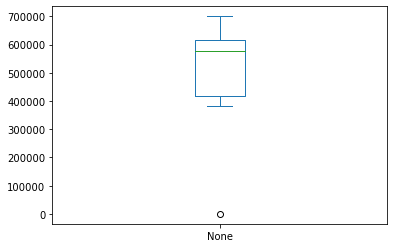

In [393]:
# this would work if I could calculate the risk free rate
# Visualize the sharpe ratios as a bar plot
axes = sharpe_ratios.plot(kind='box')
for ax in axes:
    ax.plot()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

No, the algorithmic strategies do not outperform the market (S&P 500) but they do out perform the whales portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [394]:
### I used the provided csvs because google finance was down! 
# Reading data from 1st stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path)
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [395]:
# Reading data from 2nd stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path)
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [396]:
# Reading data from 3rd stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path)
goog_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [397]:
# Combine all stocks in a single DataFrame
cost_df['Date'] = cost_df['Trade DATE'].apply(pd.to_datetime)
aapl_df['Date'] = aapl_df['Trade DATE'].apply(pd.to_datetime)
goog_df['Date'] = goog_df['Trade DATE'].apply(pd.to_datetime)

joined_df = pd.merge(cost_df, aapl_df, how="outer", on="Trade DATE")
joined_df = pd.merge(joined_df, goog_df, how="outer", on="Trade DATE")
joined_df = joined_df.set_index("Trade DATE")
joined_df

,Symbol_x,NOCP_x,Date_x,Symbol_y,NOCP_y,Date_y,Symbol,NOCP,Date
Trade DATE,,,,,,,,,
5/9/2019,COST,243.47,2019-05-09,AAPL,200.72,2019-05-09,GOOG,1162.38,2019-05-09
5/8/2019,COST,241.34,2019-05-08,AAPL,202.90,2019-05-08,GOOG,1166.27,2019-05-08
5/7/2019,COST,240.18,2019-05-07,AAPL,202.86,2019-05-07,GOOG,1174.10,2019-05-07
5/6/2019,COST,244.23,2019-05-06,AAPL,208.48,2019-05-06,GOOG,1189.39,2019-05-06
5/3/2019,COST,244.62,2019-05-03,AAPL,211.75,2019-05-03,GOOG,1185.40,2019-05-03
...,...,...,...,...,...,...,...,...,...
5/17/2018,COST,199.60,2018-05-17,AAPL,186.99,2018-05-17,GOOG,1078.59,2018-05-17
5/16/2018,COST,198.71,2018-05-16,AAPL,188.18,2018-05-16,GOOG,1081.77,2018-05-16
5/15/2018,COST,195.48,2018-05-15,AAPL,186.44,2018-05-15,GOOG,1079.23,2018-05-15


In [398]:
# Reset Date index
# joined_df["Trade DATE"] = joined_df["Trade DATE"].apply(pd.to_datetime)
# print("Date values are now type :", type(joined_df['Trade DATE'].iloc[0]))

In [399]:
# Reorganize portfolio data by having a column per symbol
#rename columns
joined_df.rename(columns = {'NOCP_x':'NOCP_COST'}, inplace = True)
joined_df.rename(columns = {'NOCP_y':'NOCP_AAPL'}, inplace = True)
joined_df.rename(columns = {'NOCP':'NOCP_GOOG'}, inplace = True)

#drop symbol columns
#joined_df.drop(columns = {'Symbol_x'}, inplace = True)
#joined_df.drop(columns = {'Symbol_y'}, inplace = True)
#joined_df.drop(columns = {'Symbol'}, inplace = True)

#drop date columns
#joined_df.drop(columns = {'Date_x'}, inplace = True)
#joined_df.drop(columns = {'Date_y'}, inplace = True)
#joined_df.drop(columns = {'Date'}, inplace = True)


joined_df.head()

,Symbol_x,NOCP_COST,Date_x,Symbol_y,NOCP_AAPL,Date_y,Symbol,NOCP_GOOG,Date
Trade DATE,,,,,,,,,
5/9/2019,COST,243.47,2019-05-09,AAPL,200.72,2019-05-09,GOOG,1162.38,2019-05-09
5/8/2019,COST,241.34,2019-05-08,AAPL,202.90,2019-05-08,GOOG,1166.27,2019-05-08
5/7/2019,COST,240.18,2019-05-07,AAPL,202.86,2019-05-07,GOOG,1174.10,2019-05-07
5/6/2019,COST,244.23,2019-05-06,AAPL,208.48,2019-05-06,GOOG,1189.39,2019-05-06
5/3/2019,COST,244.62,2019-05-03,AAPL,211.75,2019-05-03,GOOG,1185.40,2019-05-03


In [400]:
# Calculate daily returns
joined_df["COST_returns"] = joined_df["NOCP_COST"].pct_change()
joined_df["AAPL_returns"] = joined_df["NOCP_AAPL"].pct_change()
joined_df["GOOG_returns"] = joined_df["NOCP_GOOG"].pct_change()

# Drop NAs
joined_df = joined_df.dropna()
# Display sample data
joined_df.head()

,Symbol_x,NOCP_COST,Date_x,Symbol_y,NOCP_AAPL,Date_y,Symbol,NOCP_GOOG,Date,COST_returns,AAPL_returns,GOOG_returns
Trade DATE,,,,,,,,,,,,
5/8/2019,COST,241.34,2019-05-08,AAPL,202.90,2019-05-08,GOOG,1166.27,2019-05-08,-0.008749,0.010861,0.003347
5/7/2019,COST,240.18,2019-05-07,AAPL,202.86,2019-05-07,GOOG,1174.10,2019-05-07,-0.004806,-0.000197,0.006714
5/6/2019,COST,244.23,2019-05-06,AAPL,208.48,2019-05-06,GOOG,1189.39,2019-05-06,0.016862,0.027704,0.013023
5/3/2019,COST,244.62,2019-05-03,AAPL,211.75,2019-05-03,GOOG,1185.40,2019-05-03,0.001597,0.015685,-0.003355
5/2/2019,COST,242.69,2019-05-02,AAPL,209.15,2019-05-02,GOOG,1162.61,2019-05-02,-0.007890,-0.012279,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [401]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = (weights * joined_df)
# Display sample data
weighted_returns.head()

ValueError: Unable to coerce to Series, length must be 12: given 3

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [402]:
# Join your returns DataFrame to the original returns DataFrame


In [403]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!